In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Distancia de MelaJabaNobis
$$ d_m = \sqrt{(\vec{x}-\vec{\mu})^{T}\Sigma^{-1}(\vec{x}-\vec{\mu})} $$

[Text(0.5, 0, 'Estatura [cm]'), Text(0, 0.5, 'Peso [kg]')]

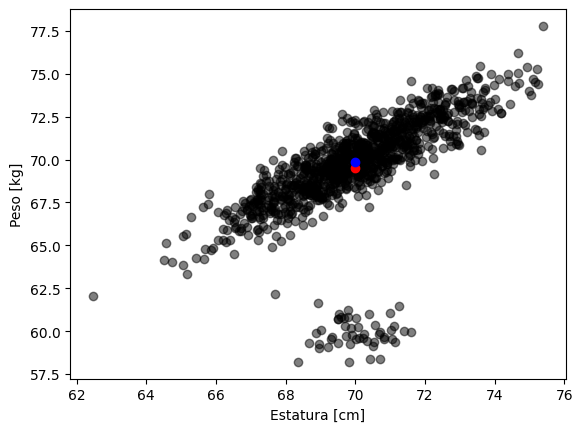

In [177]:
x1 = np.random.normal(70,2,1000)
x2 = x1 + np.random.normal(0,1,1000)

xr1 = np.random.normal(70,1,50)
xr2 = np.random.normal(60,1,50)

xt1 = np.concat((x1,xr1))
xt2 = np.concat((x2,xr2))

fig, ax = plt.subplots()
ax.plot(xt1,xt2,'ko',alpha=0.5)
ax.plot(np.mean(xt1),np.mean(xt2),'ro')
ax.plot(np.median(xt1),np.median(xt2),'bo')
ax.set(
    xlabel='Estatura [cm]',
    ylabel='Peso [kg]',
)
# ax.axis("equal")

### Distancia de MelaJabaNobis Semi - Robusta
$$ d_m = \sqrt{(\vec{x}-\vec{\bar{x}})^{T}\Sigma^{-1}(\vec{x}-\vec{\bar{x}})} $$

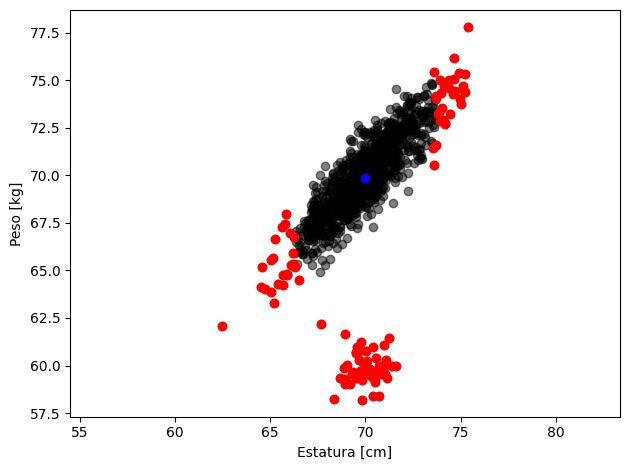

In [179]:
x = np.vstack((xt1,xt2)).T
cov = np.cov(x.T)
covs = cov + 0.02 * np.eye(len(cov)) # Encogimiento de la matriz -> Mejora la invertibilidad
covsInv = np.linalg.pinv(covs)
x_bar = np.median(x,axis=0)

def mahal(x,lambda_):

    if not(isinstance(x,np.ndarray)):
        print("X debe ser un array.")
        return
    if not(isinstance(lambda_,(int,float))):
        print("Lambda_ debe ser un int o float.")
        return
    try:
        cov = np.cov(x.T)
        covs = cov + lambda_ * np.eye(len(cov))
        covsInv = np.linalg.pinv(covs)
        x_bar = np.median(x,axis=0)

        d = np.zeros(x.shape[0])
        for i in range(x.shape[0]):
            d[i] = np.sqrt(np.dot(np.dot((x[i,:] - x_bar).T,covsInv),(x[i,:] - x_bar)))
        return d
    except:
        print("Ocurrió un error inesperado")

d = mahal(x,0.02)
d_chaves_critica = np.percentile(d,90)

fig, ax = plt.subplots()
ax.plot(x[:,0],x[:,1],'ko',alpha=0.5)
ax.plot(x[:,0][d >= d_chaves_critica],x[:,1][d >= d_chaves_critica],'ro')
ax.plot(np.median(x[:,0]),np.median(x[:,1]),'bo')
ax.set(
    xlabel='Estatura [cm]',
    ylabel='Peso [kg]',
)
ax.axis("equal")
fig.tight_layout()